In [1]:
import pandas as pd
from matplotlib.ticker import FuncFormatter

from matplotlib import pyplot as plt
%matplotlib notebook
import pymysql.cursors

from bokeh.core.properties import value
from bokeh.io import show, output_file
from bokeh.plotting import figure


In [2]:
connection = pymysql.connect(host='localhost', user='root', password='a', db='popu-gta', charset='utf8mb4',
                            cursorclass=pymysql.cursors.DictCursor)
try:
    with connection.cursor() as cursor:
        sql = "SELECT Ppcount, district from GTApopulation where 1"       
        cursor.execute(sql)
        result = cursor.fetchall()
        print(result)
finally:
    pass

[{'Ppcount': 89019, 'district': 'Markham'}, {'Ppcount': 49613, 'district': 'RichmondHill'}, {'Ppcount': 235872, 'district': 'Toronto'}, {'Ppcount': 14742, 'district': 'Vaughan'}, {'Ppcount': 32886, 'district': 'Mississauga'}, {'Ppcount': 10206, 'district': 'NewMarket'}, {'Ppcount': 11624, 'district': 'Oakville'}, {'Ppcount': 8505, 'district': 'Aurota'}, {'Ppcount': 8222, 'district': 'Hamilton'}]


In [3]:
# result

In [4]:
pop_pd = pd.DataFrame(result)
pop_pd  # population

,Ppcount,district
0,89019,Markham
1,49613,RichmondHill
2,235872,Toronto
3,14742,Vaughan
4,32886,Mississauga
5,10206,NewMarket
6,11624,Oakville
7,8505,Aurota
8,8222,Hamilton


In [5]:
pop_pd.set_index('district', inplace=True)

In [6]:
# pop_pd  # population

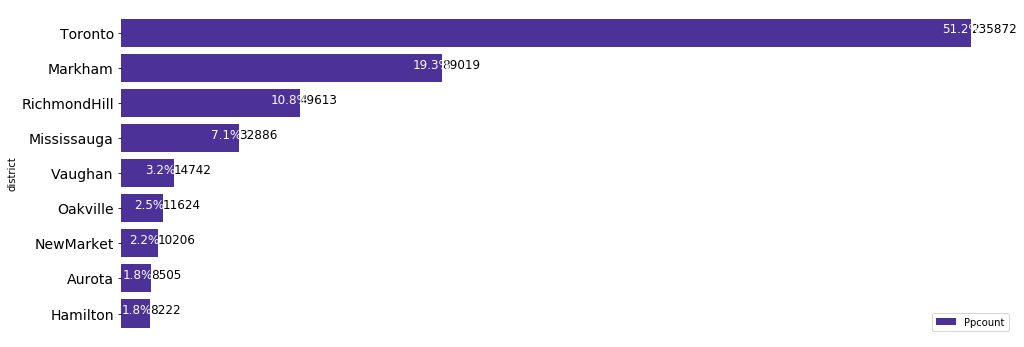

In [7]:
pop_pd.sort_values('Ppcount',ascending=True, inplace=True)
pop_ax = pop_pd.plot(kind='barh', y='Ppcount', figsize=(16,6), stacked=True, width=0.8, rot=0, color='#4c3298', fontsize=14)
pop_ax.spines['right'].set_visible(False)
pop_ax.spines['top'].set_visible(False)
pop_ax.spines['left'].set_visible(False)
pop_ax.spines['bottom'].set_visible(False)
pop_ax.axes.get_xaxis().set_visible(False)
pop_ax.set_xlabel("Area", labelpad=20, size=16)
for tick in pop_ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
for i, v in enumerate(pop_pd.Ppcount):
    pop_ax.text(v + 3, i, str(v), color='black', fontsize=12)
totals = []
for n in pop_ax.patches:
    totals.append(n.get_width())
total = sum(totals)    
# total = len(pop_pd.Ppcount)
for p in pop_ax.patches:
        percentage = '{:.1f}%'.format(100*p.get_width()/total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        pop_ax.text(x-8000, y,str(percentage), fontsize=12, color='white')   
plt.show()


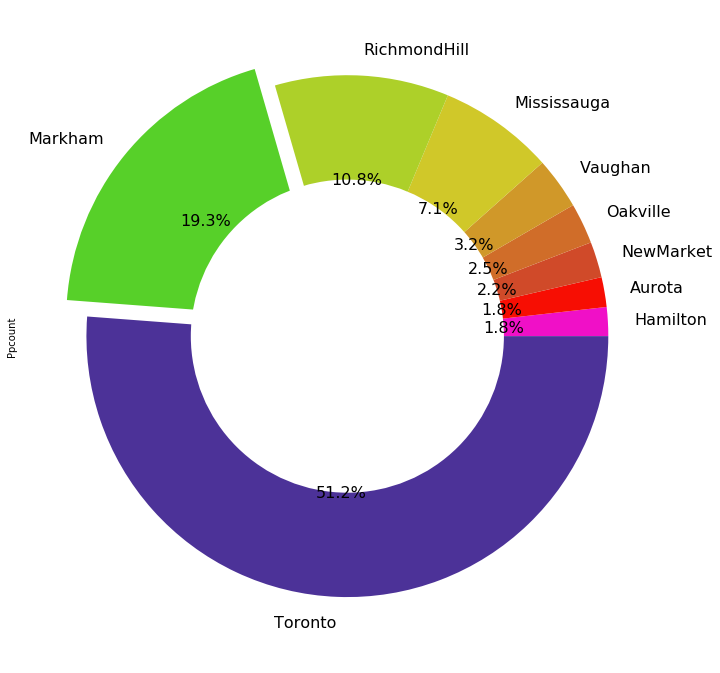

In [8]:
explode=(0, 0, 0, 0, 0, 0, 0, 0.1, 0)
colors = ['#f010c7','#f70e03','#d04a29','#d06d29','#d09829','#d0c829','#add029','#57d029','#4c3298']

pop_pd.plot.pie(subplots=True, figsize=(12,12), autopct='%1.1f%%', fontsize=16, explode=explode, legend=False, colors=colors)

# nested pie
centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# plt.tight_layout()
plt.show()

In [9]:
try:
    with connection.cursor() as cursor:
        sql = "SELECT Age, Users from agedist where 1"       
        cursor.execute(sql)
        result = cursor.fetchall()
        print(result)
finally:
    pass

[{'Age': '18-24', 'Users': 28314}, {'Age': '25-34', 'Users': 111276}, {'Age': '35-44', 'Users': 120879}, {'Age': '45-54', 'Users': 78804}, {'Age': '55-64', 'Users': 30195}, {'Age': '65+', 'Users': 16731}, {'Age': 'total', 'Users': 386199}]


In [10]:
age_df = pd.DataFrame(result)
age_df

,Age,Users
0,18-24,28314
1,25-34,111276
2,35-44,120879
3,45-54,78804
4,55-64,30195
5,65+,16731
6,total,386199


In [11]:
age_df = age_df[:-1]

In [12]:
age_df.set_index('Age', inplace=True)

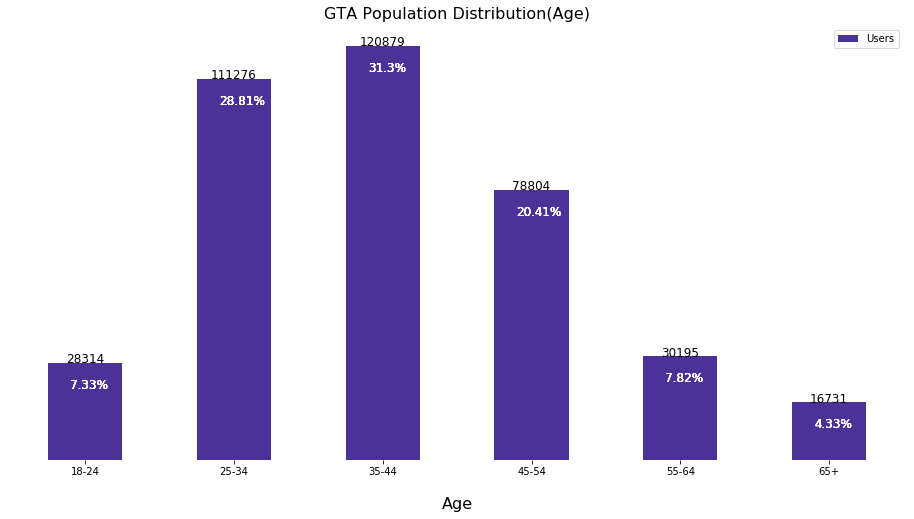

In [13]:
age_ax =age_df.plot.bar(y='Users', figsize=(16,8), stacked=True, width=0.5, rot=0, color='#4c3298')
age_ax.spines['right'].set_visible(False)
age_ax.spines['top'].set_visible(False)
age_ax.spines['left'].set_visible(False)
age_ax.spines['bottom'].set_visible(False)
age_ax.axes.get_yaxis().set_visible(False)
age_ax.set_xlabel("Age", labelpad=20, size=16)
for tick in pop_ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 

plt.title("GTA Population Distribution(Age)",fontsize=16)
totals = []
for n in age_ax.patches:
    totals.append(n.get_height())
total = sum(totals)
for i, v in enumerate(age_df.Users):
    plt.text( i,v,age_df.Users[i], fontsize=12, color='black', ha='center')

    for p in age_ax.patches:
        
        age_ax.text(p.get_x()+0.15, p.get_height()-7500, \
            str(round((p.get_height()/total)*100, 2))+'%', fontsize=12,
                color='white')     
    
plt.show()

In [14]:
# age_df.plot.pie(y='Users', figsize=(12,12))
# plt.show()

In [15]:
try:
    with connection.cursor() as cursor:
        sql = "SELECT Gender, Users from genderdist where 1"       
        cursor.execute(sql)
        result = cursor.fetchall()
        print(result)
finally:
    pass

[{'Gender': 'male', 'Users': 2010}, {'Gender': 'female', 'Users': 1973}]


In [16]:
gender_df = pd.DataFrame(result)
gender_df.set_index(gender_df.Gender, inplace= True)

In [17]:
# gender_df.plot.bar(y='Users', figsize=(16,8))
# plt.show()

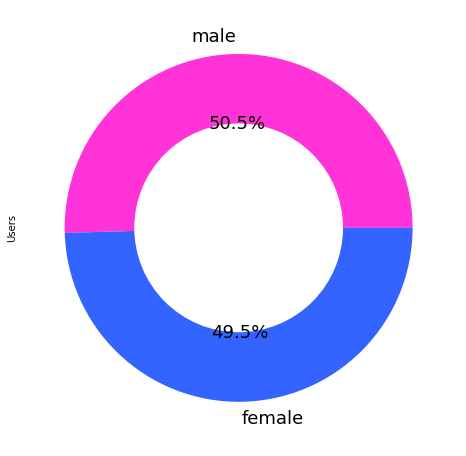

In [18]:

colors = ['#ff33d7','#3364ff']
gender_df.plot.pie(y='Users', figsize=(8,8), fontsize=18, autopct='%1.1f%%', colors=colors, legend=False)
# nested pie
centre_circle = plt.Circle((0,0), 0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

In [19]:
## import bokeh library

In [20]:
age_df

,Users
Age,
18-24,28314
25-34,111276
35-44,120879
45-54,78804
55-64,30195
65+,16731


In [21]:
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool

from bokeh.palettes import Spectral5
from bokeh.transform import factor_cmap
output_file('munitions_by_country.html')


In [22]:
source = ColumnDataSource(age_df)
countries = source.data['Age'].tolist()
p = figure(x_range=countries)

In [23]:
color_map = factor_cmap(field_name='Age',
                    palette=Spectral5, factors=countries)

p.vbar(x='Age', top='Users', source=source, width=0.70, color=color_map)

p.title.text ='Munitions Dropped by Allied Country'
p.xaxis.axis_label = 'Country'
p.yaxis.axis_label = 'Kilotons of Munitions'

/home/wilson/.local/lib/python3.5/site-packages/bokeh/models/mappers.py:139: UserWarning: Palette length does not match number of factors. ['65+'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


In [24]:
hover = HoverTool()
hover.tooltips = [
    ("Totals", "@TONS_HE High Explosive")]

hover.mode = 'vline'

p.add_tools(hover)

show(p)

In [25]:
## plot wechat groups categories distribution

In [3]:
try:
    with connection.cursor() as cursor:
        sql = "SELECT category, amount from group_cate where 1"       
        cursor.execute(sql)
        result_group_cate = cursor.fetchall()
        print(result_group_cate)
finally:
    pass

[{'category': 'Students', 'amount': 300}, {'category': 'District', 'amount': 300}, {'category': 'Realestate', 'amount': 150}, {'category': 'Immigration', 'amount': 100}, {'category': 'GroupShopping', 'amount': 500}, {'category': 'Entertainment', 'amount': 700}, {'category': 'GeneralAds', 'amount': 850}, {'category': 'Else', 'amount': 550}]


In [4]:
group_cate_df = pd.DataFrame(result_group_cate)

In [5]:
group_cate_df

,amount,category
0,300,Students
1,300,District
2,150,Realestate
3,100,Immigration
4,500,GroupShopping
5,700,Entertainment
6,850,GeneralAds
7,550,Else


In [6]:
group_cate_df.set_index('category', inplace=True)

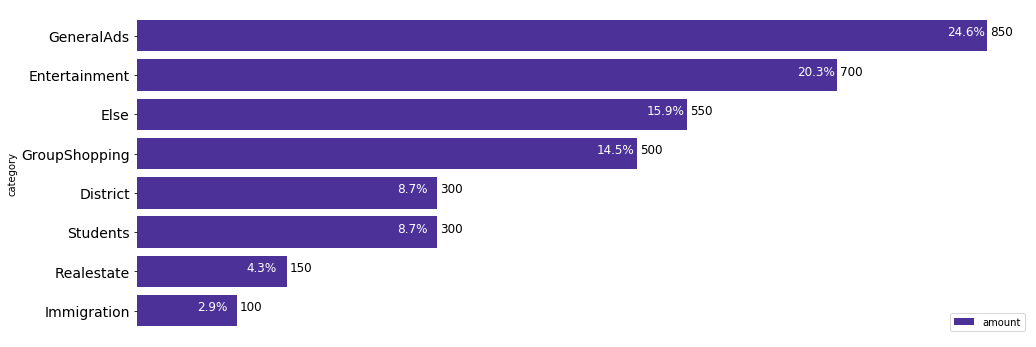

In [7]:
group_cate_df.sort_values('amount',ascending=True, inplace=True)
group_cate_ax = group_cate_df.plot(kind='barh', y='amount', figsize=(16,6), stacked=True, width=0.8, rot=0, color='#4c3298', fontsize=14)
group_cate_ax.spines['right'].set_visible(False)
group_cate_ax.spines['top'].set_visible(False)
group_cate_ax.spines['left'].set_visible(False)
group_cate_ax.spines['bottom'].set_visible(False)
group_cate_ax.axes.get_xaxis().set_visible(False)
group_cate_ax.set_xlabel("Group Categories", labelpad=20, size=16)
for tick in group_cate_ax.xaxis.get_major_ticks():
                tick.label.set_fontsize(14) 
for i, v in enumerate(group_cate_df.amount):
    group_cate_ax.text(v + 3, i, str(v), color='black', fontsize=12)
totals = []
for n in group_cate_ax.patches:
    totals.append(n.get_width())
total = sum(totals)    
for p in group_cate_ax.patches:
        percentage = '{:.1f}%'.format(100*p.get_width()/total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height()/2
        group_cate_ax.text(x-40, y,str(percentage), fontsize=12, color='white')   
plt.show()